In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train_ctrUa4K.csv")
test_data=pd.read_csv("test_lAUu6dG.csv")

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ,FunctionTransformer ,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder , LabelEncoder
from sklearn.compose import ColumnTransformer

In [4]:
def preprocessing(data):

    def feature_generation(data): #create a new feature
        
        return data
    def pipeline(data):#compelete-preprocessing
        data=feature_generation(data)
        numerical=["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term"]
        onehot=["Gender","Married","Education","Self_Employed","Credit_History"]
        ordinal=["Dependents","Property_Area"]
        dependent_order=["0","1","2","3+"]
        Property_area_order=["Rural","Semiurban","Urban"]
        # imputing missing values of numerical variables, because of outlier using log , converting into same units
        numerical_col = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='median')), ## because of outliers imputing median
        ("Log_transformer",FunctionTransformer(np.log1p, validate=False)),
        ("scale",StandardScaler())
        ])
        #coverting category variables into one-hot and imputing missing values
        one_hot_col = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("one_hot", OneHotEncoder(handle_unknown="ignore", sparse_output=False,drop='first')) ## because we have only 2 outcomes eg:gender male and female 
        
        ])
        #coverting ordinal variables into ordinal and imputing missing values
        ordinal_col = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy='most_frequent')),
        ("ordinal", OrdinalEncoder(categories=[dependent_order, Property_area_order]))
        
        ])
        
        pre_processor = (ColumnTransformer(transformers=[
        ("numerical", numerical_col, numerical),
        ("one-hot", one_hot_col, onehot),
        ("ordinal", ordinal_col, ordinal)
        ],verbose_feature_names_out=False).set_output(transform='pandas'))

        
        X_transformed = pre_processor.fit_transform(data)
        return X_transformed
        
    data=pipeline(data)
    return data
    

In [5]:
train_data['Loan_Status'] = train_data['Loan_Status'].apply(lambda data: 1 if data == 'Y' else 0)

train_data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [6]:
X=train_data.drop('Loan_Status',axis=1)
y=train_data['Loan_Status']

In [7]:
X_train_scaled=preprocessing(X)
X_train_scaled

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Dependents,Property_Area
0,0.516186,-1.107783,-0.012803,0.265985,1.0,0.0,0.0,0.0,1.0,0.0,2.0
1,0.137806,0.782158,-0.012803,0.265985,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,-0.519479,-1.107783,-1.348663,0.265985,1.0,1.0,0.0,1.0,1.0,0.0,2.0
3,-0.751605,0.897526,-0.143351,0.265985,1.0,1.0,1.0,0.0,1.0,0.0,2.0
4,0.555727,-1.107783,0.182981,0.265985,1.0,0.0,0.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
609,-0.572062,-1.107783,-1.201901,0.265985,0.0,0.0,0.0,0.0,1.0,0.0,0.0
610,-0.032679,-1.107783,-2.350110,-1.964410,1.0,1.0,0.0,0.0,1.0,3.0,0.0
611,1.015921,0.308483,1.368737,0.265985,1.0,1.0,0.0,0.0,1.0,1.0,2.0
612,0.918972,-1.107783,0.755185,0.265985,1.0,1.0,0.0,0.0,1.0,2.0,2.0


In [8]:
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import  GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, precision_recall_curve, det_curve
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold

## Logistic Regression

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y,stratify=y, test_size=0.25, random_state = 101)

In [11]:
def model_score(model):
    model.fit(X_train, y_train)
    print(model.score(X_train, y_train), model.score(X_test, y_test))
    return model

In [12]:
lr=LogisticRegression()

In [13]:
lr = model_score(lr)

0.8043478260869565 0.8246753246753247


In [14]:
pred = lr.predict(X_test)
pred

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1],
      dtype=int64)

In [15]:
pred_prob = pd.DataFrame(lr.predict_proba(X_test), index=y_test.index)

In [16]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.50      0.64        48
           1       0.81      0.97      0.88       106

    accuracy                           0.82       154
   macro avg       0.85      0.74      0.76       154
weighted avg       0.84      0.82      0.81       154



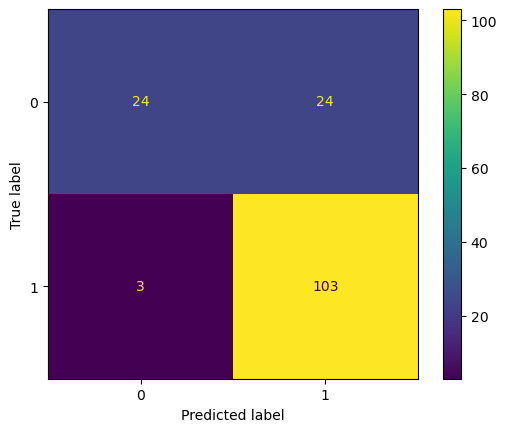

In [17]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [18]:
skf = StratifiedKFold(n_splits=5)

In [19]:
for train_index, test_index in skf.split(X_train_scaled, y):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    lr.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = lr.predict(X_test)
    print(f"classification_report: {classification_report(y_test, y_pred)}")

classification_report:               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

classification_report:               precision    recall  f1-score   support

           0       0.87      0.34      0.49        38
           1       0.77      0.98      0.86        85

    accuracy                           0.78       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.78      0.75       123

classification_report:               precision    recall  f1-score   support

           0       0.88      0.36      0.51        39
           1       0.77      0.98      0.86        84

    accuracy                           0.78       123
   macro avg       0.82      0.67      0.68       123
weigh

In [20]:
coeff = pd.DataFrame({'columns':X_train.columns, 'coef':(lr.coef_[0])})
coeff.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,3.219580
1,CoapplicantIncome,0.300895
5,Married_Yes,0.274999
0,ApplicantIncome,0.189896
9,Dependents,0.071617
10,Property_Area,0.055398
4,Gender_Male,-0.034627
7,Self_Employed_Yes,-0.103631
3,Loan_Amount_Term,-0.161610
2,LoanAmount,-0.388707


In [21]:
import statsmodels.api as sm

In [22]:
log_reg = sm.Logit( y,X_train_scaled).fit()

Optimization terminated successfully.
         Current function value: 0.497716
         Iterations 6


In [23]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:            Loan_Status   No. Observations:                  614
Model:                          Logit   Df Residuals:                      603
Method:                           MLE   Df Model:                           10
Date:                Thu, 14 Nov 2024   Pseudo R-squ.:                  0.1988
Time:                        00:35:51   Log-Likelihood:                -305.60
converged:                       True   LL-Null:                       -381.45
Covariance Type:            nonrobust   LLR p-value:                 1.669e-27
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
ApplicantIncome            0.3015      0.142      2.126      0.034       0.024       0.580
CoapplicantIncome          0.3578      0.126      2.843      0.004       0.111       0.604
Loan

Check any multicollinearity

In [25]:
X_train_scaled.corr()>0.5 #var#xgboost

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Dependents,Property_Area
ApplicantIncome,True,False,False,False,False,False,False,False,False,False,False
CoapplicantIncome,False,True,False,False,False,False,False,False,False,False,False
LoanAmount,False,False,True,False,False,False,False,False,False,False,False
Loan_Amount_Term,False,False,False,True,False,False,False,False,False,False,False
Gender_Male,False,False,False,False,True,False,False,False,False,False,False
Married_Yes,False,False,False,False,False,True,False,False,False,False,False
Education_Not Graduate,False,False,False,False,False,False,True,False,False,False,False
Self_Employed_Yes,False,False,False,False,False,False,False,True,False,False,False
Credit_History_1.0,False,False,False,False,False,False,False,False,True,False,False
Dependents,False,False,False,False,False,False,False,False,False,True,False


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
X = add_constant(X_train_scaled)
# Calculating VIF for every column (only works for the not Catagorical)
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [27]:
vif

,Variable,VIF
0,const,14.917693
1,ApplicantIncome,1.870775
2,CoapplicantIncome,1.565044
3,LoanAmount,1.616334
4,Loan_Amount_Term,1.035372
5,Gender_Male,1.205159
6,Married_Yes,1.392069
7,Education_Not Graduate,1.067051
8,Self_Employed_Yes,1.042410
9,Credit_History_1.0,1.009418


# Decision Tree

In [29]:
params=({('criterion'):('gini', 'entropy','log_loss'),
        ('max_depth'):(2,4,6,8,10),
         ('min_samples_split'):(2,4,6)
        })

In [30]:
clf = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=params, n_jobs=-1, cv=5, verbose=1)

In [31]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy',
                                                      'log_loss'),
                                        'max_depth': (2, 4, 6, 8, 10),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=1)

In [32]:
print(clf.best_estimator_)

DecisionTreeClassifier(criterion='log_loss', max_depth=2, min_samples_split=6)


In [33]:
dt=DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=4)

In [34]:
model_score(dt)

0.8089430894308943 0.819672131147541


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_split=4)

In [35]:
pred = dt.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [36]:
pred_prob = pd.DataFrame(dt.predict_proba(X_test), index=y_test.index)

In [37]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        84

    accuracy                           0.82       122
   macro avg       0.87      0.72      0.75       122
weighted avg       0.84      0.82      0.80       122



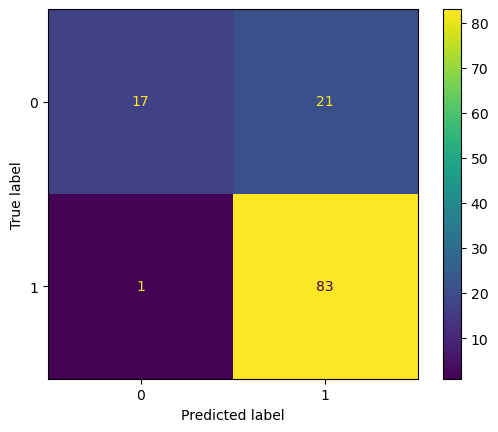

In [38]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [39]:
for train_index, test_index in skf.split(X_train_scaled, y):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    dt.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = dt.predict(X_test)
    print(f"classification_report: {classification_report(y_test, y_pred)}")

classification_report:               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

classification_report:               precision    recall  f1-score   support

           0       0.85      0.29      0.43        38
           1       0.75      0.98      0.85        85

    accuracy                           0.76       123
   macro avg       0.80      0.63      0.64       123
weighted avg       0.78      0.76      0.72       123

classification_report:               precision    recall  f1-score   support

           0       0.88      0.36      0.51        39
           1       0.77      0.98      0.86        84

    accuracy                           0.78       123
   macro avg       0.82      0.67      0.68       123
weigh

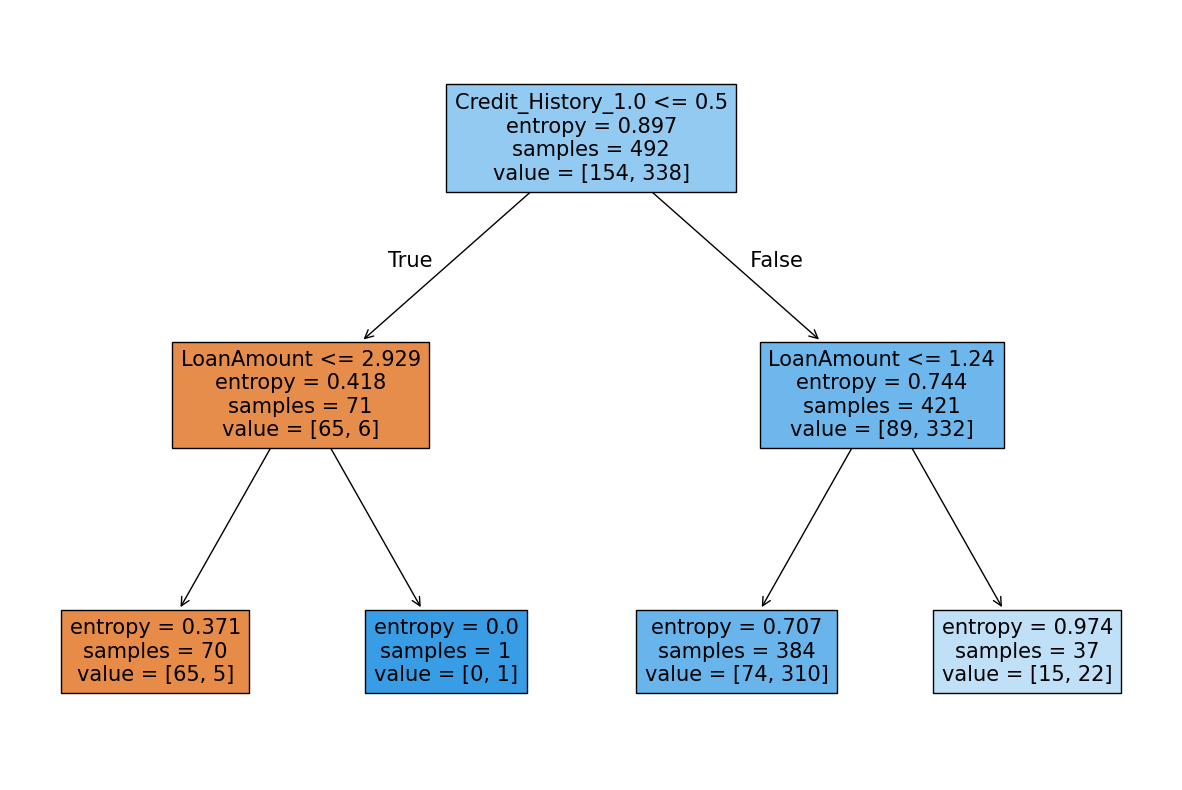

In [40]:
plt.figure(figsize=(15,10))
plot_tree(dt, feature_names=X_train_scaled.columns.to_list(), filled=True, max_depth=2)
plt.show()

In [41]:
#it helps to see a feature's contribution to the model 
from sklearn.inspection import permutation_importance

In [42]:
result = permutation_importance(dt, X_train_scaled, y)
feature_imp = pd.DataFrame({'columns':X_train_scaled.columns, 'coef':result.importances_mean})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,0.182410
2,LoanAmount,0.001629
0,ApplicantIncome,0.000000
1,CoapplicantIncome,0.000000
3,Loan_Amount_Term,0.000000
4,Gender_Male,0.000000
5,Married_Yes,0.000000
6,Education_Not Graduate,0.000000
7,Self_Employed_Yes,0.000000
9,Dependents,0.000000


# Random Forest

In [44]:
params=({('n_estimators'):(100,200,300),
         ('criterion'):('gini', 'entropy'),
         ('max_depth'):(2,4,6,8,10),
         ('min_samples_split'):(2,4,6)
        })

In [45]:
rf = RandomizedSearchCV(RandomForestClassifier(class_weight='balanced'), param_distributions=params, n_jobs=-1, cv=5, verbose=1)

In [46]:
rf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(class_weight='balanced'),
                   n_jobs=-1,
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (2, 4, 6, 8, 10),
                                        'min_samples_split': (2, 4, 6),
                                        'n_estimators': (100, 200, 300)},
                   verbose=1)

In [47]:
print(rf.best_estimator_)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=2, min_samples_split=4)


In [48]:
RF=RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=200,min_samples_split=4)

In [49]:
rf=model_score(RF)

0.806910569105691 0.819672131147541


In [50]:
pred = RF.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0], dtype=int64)

In [51]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        84

    accuracy                           0.82       122
   macro avg       0.87      0.72      0.75       122
weighted avg       0.84      0.82      0.80       122



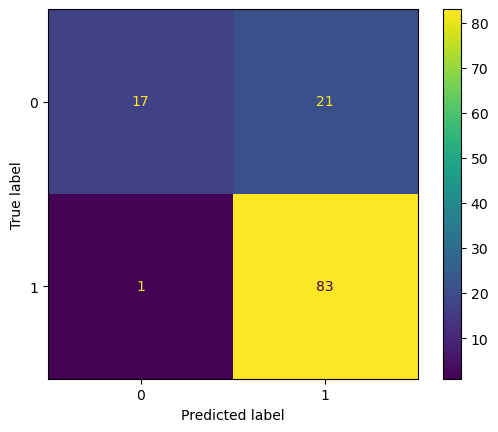

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [53]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':rf.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,0.469506
2,LoanAmount,0.113559
0,ApplicantIncome,0.097983
1,CoapplicantIncome,0.080944
10,Property_Area,0.072047
3,Loan_Amount_Term,0.071176
6,Education_Not Graduate,0.037024
5,Married_Yes,0.027275
9,Dependents,0.018537
4,Gender_Male,0.007463


In [54]:
for train_index, test_index in skf.split(X_train_scaled, y):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    RF.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = RF.predict(X_test)
    print(f"classification_report: {classification_report(y_test, y_pred)}")

classification_report:               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

classification_report:               precision    recall  f1-score   support

           0       0.87      0.34      0.49        38
           1       0.77      0.98      0.86        85

    accuracy                           0.78       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.78      0.75       123

classification_report:               precision    recall  f1-score   support

           0       0.88      0.36      0.51        39
           1       0.77      0.98      0.86        84

    accuracy                           0.78       123
   macro avg       0.82      0.67      0.68       123
weigh

In [55]:
result = permutation_importance(RF, X_train_scaled, y)
feature_imp = pd.DataFrame({'columns':X_train_scaled.columns, 'coef':result.importances_mean})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,0.184039
0,ApplicantIncome,0.001629
1,CoapplicantIncome,0.001629
2,LoanAmount,0.000977
10,Property_Area,0.000651
6,Education_Not Graduate,0.000326
3,Loan_Amount_Term,0.000000
4,Gender_Male,0.000000
5,Married_Yes,0.000000
7,Self_Employed_Yes,0.000000


# GRADIENT BOOSTING

In [57]:
distributions = {'n_estimators': (100, 200,300,400,500,1000), 
                 'learning_rate': (0.001,0.001,0.01,0.1,1, 10),
                 'min_samples_split': (2,3,4,5,6,7, 8), 
                 'max_depth': (3,4,5,6,7, 8)}

In [58]:


GB = RandomizedSearchCV(GradientBoostingClassifier(), param_distributions=distributions, n_iter=10, n_jobs=-1, verbose=1)

In [59]:
GB.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=GradientBoostingClassifier(), n_jobs=-1,
                   param_distributions={'learning_rate': (0.001, 0.001, 0.01,
                                                          0.1, 1, 10),
                                        'max_depth': (3, 4, 5, 6, 7, 8),
                                        'min_samples_split': (2, 3, 4, 5, 6, 7,
                                                              8),
                                        'n_estimators': (100, 200, 300, 400,
                                                         500, 1000)},
                   verbose=1)

In [60]:
GB.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, min_samples_split=4)

In [61]:
GB=GradientBoostingClassifier(learning_rate=0.001, max_depth=6, n_estimators=1000)

In [62]:
rf=model_score(GB)

0.8658536585365854 0.7950819672131147


In [63]:
pred = GB.predict(X_test)
pred

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [64]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.45      0.58        38
           1       0.79      0.95      0.86        84

    accuracy                           0.80       122
   macro avg       0.80      0.70      0.72       122
weighted avg       0.80      0.80      0.77       122



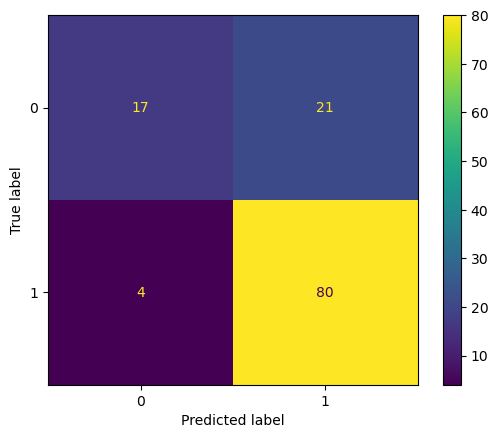

In [65]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [66]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':rf.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,0.477827
2,LoanAmount,0.155848
0,ApplicantIncome,0.152994
1,CoapplicantIncome,0.068164
3,Loan_Amount_Term,0.045023
10,Property_Area,0.038567
9,Dependents,0.023116
5,Married_Yes,0.017813
4,Gender_Male,0.009800
6,Education_Not Graduate,0.007926


In [67]:
for train_index, test_index in skf.split(X_train_scaled, y):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    GB.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = GB.predict(X_test)
    print(f"classification_report: {classification_report(y_test, y_pred)}")

classification_report:               precision    recall  f1-score   support

           0       0.93      0.37      0.53        38
           1       0.78      0.99      0.87        85

    accuracy                           0.80       123
   macro avg       0.86      0.68      0.70       123
weighted avg       0.83      0.80      0.76       123

classification_report:               precision    recall  f1-score   support

           0       0.73      0.29      0.42        38
           1       0.75      0.95      0.84        85

    accuracy                           0.75       123
   macro avg       0.74      0.62      0.63       123
weighted avg       0.74      0.75      0.71       123

classification_report:               precision    recall  f1-score   support

           0       0.87      0.33      0.48        39
           1       0.76      0.98      0.85        84

    accuracy                           0.77       123
   macro avg       0.81      0.65      0.67       123
weigh

In [68]:
result = permutation_importance(GB, X_train_scaled, y)
feature_imp = pd.DataFrame({'columns':X_train_scaled.columns, 'coef':result.importances_mean})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,0.184365
0,ApplicantIncome,0.037459
10,Property_Area,0.035831
2,LoanAmount,0.029642
1,CoapplicantIncome,0.011726
3,Loan_Amount_Term,0.008795
9,Dependents,0.008143
5,Married_Yes,0.000651
7,Self_Employed_Yes,-0.000651
4,Gender_Male,-0.001629


## XGBOOST

In [70]:
from xgboost import XGBClassifier

In [71]:
!pip install optuna

In [72]:
import optuna

In [73]:
def objective(trial):
    # Hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 100, 3000)
    max_depth = trial.suggest_int('max_depth', 3, 15)
    learning_rate = trial.suggest_float('learning_rate', 0.001, 1.0, log=True)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_float('gamma', 0, 5)
    scale_pos_weight = trial.suggest_float('scale_pos_weight', 1, 10)  # Important for handling imbalance
    
    # Create the XGBoost model
    xgb = XGBClassifier(
        n_estimators=n_estimators, 
        max_depth=max_depth, 
        learning_rate=learning_rate,
        colsample_bytree=colsample_bytree,
        subsample=subsample,
        min_child_weight=min_child_weight,
        gamma=gamma,
        scale_pos_weight=scale_pos_weight
    )
    
    # Cross-validation
    return cross_val_score(xgb, X_train, y_train, n_jobs=-1, cv=3).mean()


In [74]:
study = optuna.create_study(direction='maximize')

[I 2024-11-14 00:37:25,937] A new study created in memory with name: no-name-46c29d82-d43f-4055-b64f-1df0ce81b9c6


In [75]:
study.optimize(objective, n_trials=100, show_progress_bar=True)

  0%|          | 0/100 [00:00<?, ?it/s]

[I 2024-11-14 00:37:27,389] Trial 0 finished with value: 0.790650406504065 and parameters: {'n_estimators': 2212, 'max_depth': 14, 'learning_rate': 0.004381431995360453, 'colsample_bytree': 0.5786866771222321, 'subsample': 0.6414422586483582, 'min_child_weight': 1, 'gamma': 2.5557401240689175, 'scale_pos_weight': 8.833760343047192}. Best is trial 0 with value: 0.790650406504065.
[I 2024-11-14 00:37:27,929] Trial 1 finished with value: 0.7865853658536586 and parameters: {'n_estimators': 963, 'max_depth': 15, 'learning_rate': 0.37128573928746056, 'colsample_bytree': 0.7423065284883379, 'subsample': 0.5910560352939331, 'min_child_weight': 1, 'gamma': 3.189283900476161, 'scale_pos_weight': 3.199233775914278}. Best is trial 0 with value: 0.790650406504065.
[I 2024-11-14 00:37:28,502] Trial 2 finished with value: 0.7296747967479674 and parameters: {'n_estimators': 1117, 'max_depth': 6, 'learning_rate': 0.14933494712921788, 'colsample_bytree': 0.5430822113383685, 'subsample': 0.60439569616166

In [76]:
study.best_params

{'n_estimators': 780,
 'max_depth': 10,
 'learning_rate': 0.012751983704270806,
 'colsample_bytree': 0.9357549279177467,
 'subsample': 0.8016536154894923,
 'min_child_weight': 4,
 'gamma': 2.8272489291622844,
 'scale_pos_weight': 3.1409996974876906}

In [77]:
study.best_value

0.8069105691056911

In [78]:
ratio = len(y_train[y_train == 0]) / len(y_train[y_train == 1])
xgb_model = XGBClassifier(
    n_estimators=1311, 
    use_label_encoder=False,
    max_depth=14, 
    learning_rate=0.03414427911459815,
    colsample_bytree=0.6469298841998028,
    subsample=0.9604581460706335,
    min_child_weight= 6,
    gamma= 1.7534240161969306,
    scale_pos_weight =1.78
    
)


In [79]:
model_score(xgb_model)

0.806910569105691 0.819672131147541


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6469298841998028, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=1.7534240161969306,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03414427911459815,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1311, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
pred = xgb_model.predict(X_test)
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [81]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.45      0.61        38
           1       0.80      0.99      0.88        84

    accuracy                           0.82       122
   macro avg       0.87      0.72      0.75       122
weighted avg       0.84      0.82      0.80       122



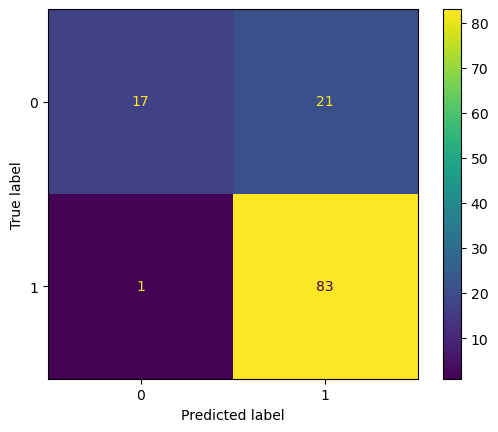

In [82]:
ConfusionMatrixDisplay.from_predictions(y_test, pred)

In [83]:
feature_imp = pd.DataFrame({'columns':X_train.columns, 'coef':xgb_model.feature_importances_})
feature_imp.sort_values(by='coef', ascending=False)

,columns,coef
8,Credit_History_1.0,0.491586
1,CoapplicantIncome,0.062252
0,ApplicantIncome,0.057712
10,Property_Area,0.054742
4,Gender_Male,0.054107
2,LoanAmount,0.052650
9,Dependents,0.049120
6,Education_Not Graduate,0.047860
3,Loan_Amount_Term,0.045249
5,Married_Yes,0.045207


In [84]:
for train_index, test_index in skf.split(X_train_scaled, y):
    X_train, X_test = X_train_scaled.iloc[train_index], X_train_scaled.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train the model
    xgb_model.fit(X_train, y_train)

    # Make predictions and evaluate
    y_pred = xgb_model.predict(X_test)
    print(f"classification_report: {classification_report(y_test, y_pred)}")

classification_report:               precision    recall  f1-score   support

           0       0.94      0.42      0.58        38
           1       0.79      0.99      0.88        85

    accuracy                           0.81       123
   macro avg       0.87      0.70      0.73       123
weighted avg       0.84      0.81      0.79       123

classification_report:               precision    recall  f1-score   support

           0       0.87      0.34      0.49        38
           1       0.77      0.98      0.86        85

    accuracy                           0.78       123
   macro avg       0.82      0.66      0.68       123
weighted avg       0.80      0.78      0.75       123

classification_report:               precision    recall  f1-score   support

           0       0.88      0.36      0.51        39
           1       0.77      0.98      0.86        84

    accuracy                           0.78       123
   macro avg       0.82      0.67      0.68       123
weigh

In [85]:
from imblearn.over_sampling import SMOTE 
from sklearn.model_selection import train_test_split
smote = SMOTE(random_state=101)
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y,stratify=y, test_size=0.25, random_state = 101)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


y_pred_prob = xgb_model.predict_proba(X_test)[:, 1]  # probabilities for class 1

# Apply a threshold of 0.6
y_pred = (y_pred_prob > 0.8).astype(int)

# Evaluate the predictions
print(y_pred)


[1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1
 1 0 1 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 0 0 1 0 1 1
 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 0 0 1 0 1
 1 1 0 1 0 1]


In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71        48
           1       0.88      0.86      0.87       106

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



Test Data

In [88]:
test=preprocessing(test_data)

In [89]:
test

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Credit_History_1.0,Dependents,Property_Area
0,0.491874,-1.151676,-0.306618,0.236736,1.0,1.0,0.0,0.0,1.0,0.0,2.0
1,-0.265225,0.759616,0.020496,0.236736,1.0,1.0,0.0,0.0,1.0,1.0,2.0
2,0.327675,0.807232,1.230616,0.236736,1.0,1.0,0.0,0.0,1.0,2.0,2.0
3,-0.598951,0.897800,-0.535962,0.236736,1.0,1.0,0.0,0.0,1.0,2.0,2.0
4,-0.188350,-1.151676,-1.132760,0.236736,1.0,0.0,1.0,0.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
362,0.058075,0.803873,-0.241834,0.236736,1.0,1.0,1.0,1.0,1.0,3.0,2.0
363,0.102613,0.563983,-0.199586,0.236736,1.0,1.0,0.0,0.0,1.0,0.0,2.0
364,-0.198074,0.833835,0.020496,0.236736,1.0,0.0,0.0,0.0,1.0,0.0,1.0
365,0.327675,0.881611,0.566388,0.236736,1.0,1.0,0.0,0.0,1.0,0.0,0.0


In [90]:
y_pred=xgb_model.predict_proba(test)[:, 1]
y_pred = (y_pred > 0.8).astype(int)

In [213]:
sub_data = pd.DataFrame({
    'Loan_ID': test_data['Loan_ID'],   # Keep the Loan_ID from the test data
    'Loan_Status': y_pred               # Add the predictions (y_pred)
})
sub_data['Loan_Status'] = sub_data['Loan_Status'].map({0: 'N', 1: 'Y'})


In [217]:
sub_data.to_csv('submission.csv', index=False)

In [215]:
sub_data

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,N
